In [1]:
names = ['power', 'procentage', 'Q_mean', 'W_mean',
 'freq_pair_no', 'nu1', 'nu2',
 'tb_mean_nu1', 'tb_mean_nu2',
 'tau_mean_nu1', 'tau_mean_nu2',
 'Qr_mean', 'Wr_mean', 'Qrs', 'Wrs',
]

In [2]:
n = {}
for key, value in enumerate(names):
    n[value] = key

In [3]:
# import dill
# with open('pre_data.bin', 'rb') as dump:
#     data = dill.load(dump)

In [4]:
import dill
with open('pre_data_new_kw_t0.bin', 'rb') as dump:
    data = dill.load(dump)

In [5]:
data.shape

(3001, 15)

In [6]:
import numpy as np
data = np.array(data[1:, :]).astype(float)

In [7]:
power = np.unique(data[:, n['power']])
power

array([0.        , 0.12820513, 0.25641026, 0.38461538, 0.51282051,
       0.64102564, 0.76923077, 0.8974359 , 1.02564103, 1.15384615,
       1.28205128, 1.41025641, 1.53846154, 1.66666667, 1.79487179,
       1.92307692, 2.05128205, 2.17948718, 2.30769231, 2.43589744,
       2.56410256, 2.69230769, 2.82051282, 2.94871795, 3.07692308,
       3.20512821, 3.33333333, 3.46153846, 3.58974359, 3.71794872,
       3.84615385, 3.97435897, 4.1025641 , 4.23076923, 4.35897436,
       4.48717949, 4.61538462, 4.74358974, 4.87179487, 5.        ])

In [8]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.family': 'serif'})
# matplotlib.rcParams.update({'text.latex.preamble': 
#                             r'\usepackage{amsmath}'})

In [9]:
np.unique(data[:, n['procentage']])

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

### LWC, 72% percentage

<IPython.core.display.Javascript object>


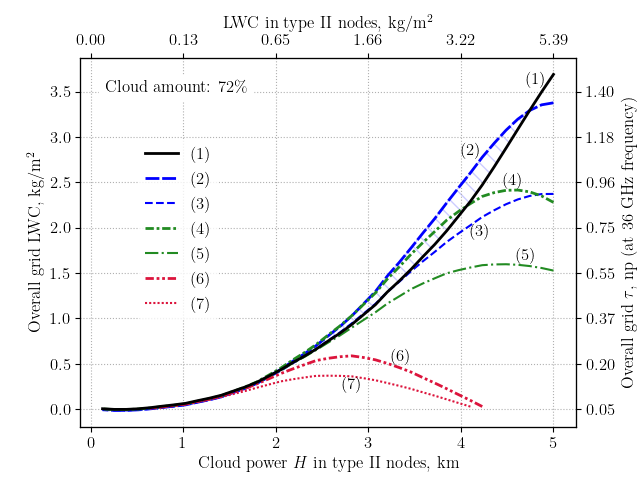

In [10]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# def savgol_filter(x, s, d):
#     return x

plt.figure()

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
         color='black', 
         linestyle='-', zorder=99, linewidth=2,
         label='(1)')
plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2,
         label='(2)')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

plt.fill_between(power[power < 4.745], 
                 savgol_filter(W_mean, smoothness, 3)[power < 4.745], 
                 savgol_filter(Wr_mean, smoothness, 3)[power < 4.745],
                alpha=0.2, hatch='\\\\', facecolor='white', edgecolor='blue')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu36 = data[cond, n['tau_mean_nu2']]

plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'],  linewidth=2,
         label='(4)')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
         color='forestgreen',
         linestyle='-.',  linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2,
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'], label='(6)')
plt.plot(power, np.where(Wrs > 0, savgol_filter(Wrs, smoothness, 3), None),  linewidth=1.5,
         color='crimson',
         linestyle=linestyles['densely dotted'], label='(7)')

plt.xlabel('Cloud power $H$ in type II nodes, km')
plt.ylabel('Overall grid LWC, kg/m$^2$')

leg = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.1, 0., 0.5, 0.8))
leg.get_frame().set_linewidth(0.0)

plt.grid(axis='both', ls=':')

xticks = plt.xticks()[0]
xlim = plt.xlim()
yticks = plt.yticks()[0]
ylim = plt.ylim()

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(xlim)
ax2.set_xticks(xticks[1:-1], ['{:.2f}'.format(w) for w in _c0 * np.power(xticks[1:-1], _c1)])
ax2.set_xlabel('LWC in type II nodes, kg/m$^2$')

plt.text(4.7, 3.59, '(1)')
plt.text(4, 2.8, '(2)')
plt.text(4.1, 1.91, '(3)')
plt.text(4.45, 2.47, '(4)')
plt.text(4.6, 1.65, '(5)')
plt.text(3.25, 0.53, '(6)')
plt.text(2.715, 0.225, '(7)')
t = plt.text(0.15, 3.5, r'Cloud amount: 72$\%$')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

ax3 = ax.twinx()
ax3.set_ylim(ylim)
f222 = interp1d(W_mean, tau_mean_nu222)
f272 = interp1d(W_mean, tau_mean_nu272)
f36 = interp1d(W_mean, tau_mean_nu36)
ax3.set_yticks(yticks[1:-1], ['{:.2f}'.format(tau) for tau in f36(yticks[1:-1])])
ax3.set_ylabel(r'Overall grid $\tau$, np (at 36 GHz frequency)')

# plt.savefig('fig/pre_fig01.eps')
plt.savefig('fig/pre_fig01_72_tcl0.png', dpi=300)

### LWC, 100% percentage

<IPython.core.display.Javascript object>


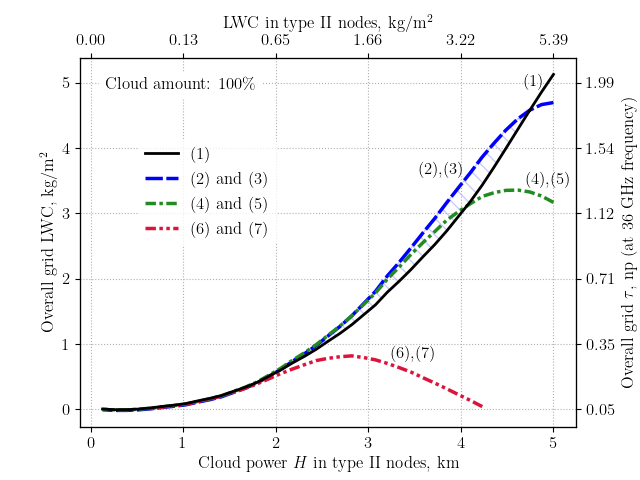

In [11]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# def savgol_filter(x, s, d):
#     return x

plt.figure()

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

proc = 100

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
         color='black', 
         linestyle='-', zorder=99, linewidth=2,
         label='(1)')
plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.5,
         label='(2) and (3)')

plt.fill_between(power[power < 4.745], 
                 savgol_filter(W_mean, smoothness, 3)[power < 4.745], 
                 savgol_filter(Wr_mean, smoothness, 3)[power < 4.745],
                alpha=0.2, hatch='\\\\', facecolor='white', edgecolor='blue')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu36 = data[cond, n['tau_mean_nu2']]

plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'],  linewidth=2.5,
         label='(4) and (5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2.5,
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'], label='(6) and (7)')

plt.xlabel('Cloud power $H$ in type II nodes, km')
plt.ylabel('Overall grid LWC, kg/m$^2$')

leg = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.1, 0., 0.5, 0.8))
leg.get_frame().set_linewidth(0.0)

plt.grid(axis='both', ls=':')

xticks = plt.xticks()[0]
xlim = plt.xlim()
yticks = plt.yticks()[0]
ylim = plt.ylim()

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(xlim)
ax2.set_xticks(xticks[1:-1], ['{:.2f}'.format(w) for w in _c0 * np.power(xticks[1:-1], _c1)])
ax2.set_xlabel('LWC in type II nodes, kg/m$^2$')

plt.text(4.68, 4.95, '(1)')
plt.text(3.55, 3.6, '(2),(3)')

plt.text(4.7, 3.45, '(4),(5)')

plt.text(3.25, 0.79, '(6),(7)')

t = plt.text(0.15, 4.9, r'Cloud amount: 100$\%$')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

ax3 = ax.twinx()
ax3.set_ylim(ylim)
f222 = interp1d(W_mean, tau_mean_nu222)
f272 = interp1d(W_mean, tau_mean_nu272)
f36 = interp1d(W_mean, tau_mean_nu36)
ax3.set_yticks(yticks[1:-1], ['{:.2f}'.format(tau) for tau in f36(yticks[1:-1])])
ax3.set_ylabel(r'Overall grid $\tau$, np (at 36 GHz frequency)')

plt.savefig('fig/pre_fig01_100_tcl0.png', dpi=300)

### TWV, 72% percentage

<IPython.core.display.Javascript object>


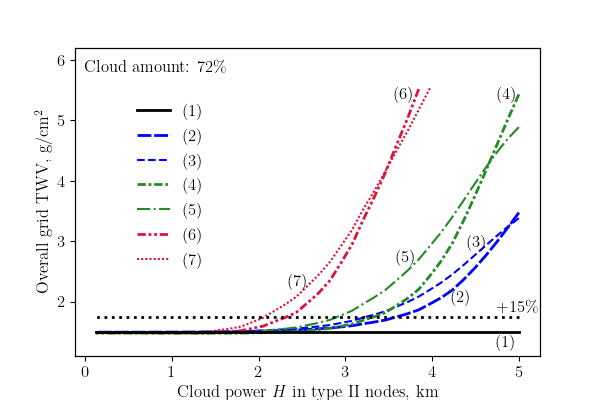

In [12]:
from scipy.signal import savgol_filter

plt.figure(figsize=(6, 4))

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, Q_mean / Q_mean * 1.5, color='black', linestyle='-', 
         linewidth=2, label='(1)', zorder=99)
plt.plot(power, Q_mean / Q_mean * 1.5 * 1.16, color='black', linestyle=':', 
         linewidth=2, zorder=99)
plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.,
         label='(2)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'], linewidth=2.,
         label='(4)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle='-.', linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
         label='(6)')
plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dotted'], linewidth=1.5,
         label='(7)')

plt.xlabel('Cloud power $H$ in type II nodes, km')
plt.ylabel('Overall grid TWV, g/cm$^2$')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.87))

plt.ylim(1, 10.5)
plt.ylim(1.1, 6.2)

xticks = plt.xticks()[0]

ax = plt.gca()
ax2 = ax.twiny()
ax2.plot(_c0 * np.power(power, _c1), 
         savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
# ax2.set_xlabel('LWC in cloud-filled grid cells, kg/m$^2$')
ax2.set_xlabel('')
ax2.set_xticks([])

plt.text(5.1, 1.25, '(1)')
plt.text(4.53, 1.99, '(2)')
plt.text(4.735, 2.9, '(3)')
plt.text(5.11, 5.35, '(4)')
plt.text(3.82, 2.66, '(5)')
plt.text(3.8, 5.35, '(6)')
plt.text(2.45, 2.26, '(7)')
plt.text(-0.15, 5.8, r'Cloud amount: 72$\%$')
plt.text(5.1, 1.82, r'+15$\%$')

# plt.savefig('fig/pre_fig02.eps')
plt.savefig('fig/pre_fig02_72_tcl0.png', dpi=300)

### TWV, 100% percentage

<IPython.core.display.Javascript object>


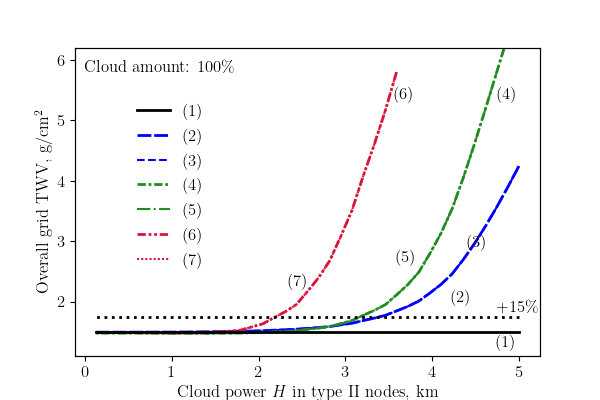

2.2182094380900033   0.44334397763613   0.5238230423041732 
 1.9292538807885478   0.3912024022892584   0.6866876823945012 



In [13]:
from scipy.signal import savgol_filter

plt.figure(figsize=(6, 4))

proc = 100

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, Q_mean / Q_mean * 1.5, color='black', linestyle='-', 
         linewidth=2, label='(1)', zorder=99)
plt.plot(power, Q_mean / Q_mean * 1.5 * 1.16, color='black', linestyle=':', 
         linewidth=2, zorder=99)
plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.,
         label='(2)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'], linewidth=2.,
         label='(4)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle='-.', linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
         label='(6)')
plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dotted'], linewidth=1.5,
         label='(7)')

plt.xlabel('Cloud power $H$ in type II nodes, km')
plt.ylabel('Overall grid TWV, g/cm$^2$')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.87))

plt.ylim(1, 10.5)
plt.ylim(1.1, 6.2)

xticks = plt.xticks()[0]

ax = plt.gca()
ax2 = ax.twiny()
ax2.plot(_c0 * np.power(power, _c1), 
         savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
ax2.set_xlabel('LWC in cloud-filled grid cells, kg/m$^2$')
ax2.set_xlabel('')
ax2.set_xticks([])

plt.text(5.1, 1.25, '(1)')
plt.text(4.53, 1.99, '(2)')
plt.text(4.735, 2.9, '(3)')
plt.text(5.11, 5.35, '(4)')
plt.text(3.82, 2.66, '(5)')
plt.text(3.8, 5.35, '(6)')
plt.text(2.45, 2.26, '(7)')
plt.text(-0.15, 5.8, r'Cloud amount: 100$\%$')
plt.text(5.1, 1.82, r'+15$\%$')

# plt.savefig('fig/pre_fig02.eps')
plt.savefig('fig/pre_fig02_100_tcl0.png', dpi=300)

####################################################################################################
####################################################################################################
print(
    
    _c0 * np.power(3.4, _c1), ' ', f222(_c0 * np.power(3.4, _c1)), ' ', f272(_c0 * np.power(3.4, _c1)), '\n',
    _c0 * np.power(3.2, _c1), ' ', f222(_c0 * np.power(3.2, _c1)), ' ', f36(_c0 * np.power(3.2, _c1)), '\n',
)

### Russian

In [ ]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# def savgol_filter(x, s, d):
#     return x

plt.figure()

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
         color='black', 
         linestyle='-', zorder=99, linewidth=2,
         label='(1)')
plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2,
         label='(2)')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

plt.fill_between(power[power < 4.745], 
                 savgol_filter(W_mean, smoothness, 3)[power < 4.745], 
                 savgol_filter(Wr_mean, smoothness, 3)[power < 4.745],
                alpha=0.2, hatch='\\\\', facecolor='white', edgecolor='blue')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu36 = data[cond, n['tau_mean_nu2']]

plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'],  linewidth=2,
         label='(4)')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
         color='forestgreen',
         linestyle='-.',  linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2,
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'], label='(6)')
plt.plot(power, np.where(Wrs > 0, savgol_filter(Wrs, smoothness, 3), None),  linewidth=1.5,
         color='crimson',
         linestyle=linestyles['densely dotted'], label='(7)')

plt.xlabel('Высота $H$ слоя облачности в узлах II типа, км')
plt.ylabel('Водозапас в среднем по расчетной области, кг/м$^2$')

leg = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.1, 0., 0.5, 0.8))
leg.get_frame().set_linewidth(0.0)

plt.grid(axis='both', ls=':')

xticks = plt.xticks()[0]
xlim = plt.xlim()
yticks = plt.yticks()[0]
ylim = plt.ylim()

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(xlim)
ax2.set_xticks(xticks[1:-1], ['{:.2f}'.format(w) for w in _c0 * np.power(xticks[1:-1], _c1)])
ax2.set_xlabel('Истинный водозапас в узлах II типа, кг/м$^2$')

plt.text(4.7, 3.59, '(1)')
plt.text(4, 2.8, '(2)')
plt.text(4.1, 1.91, '(3)')
plt.text(4.45, 2.47, '(4)')
plt.text(4.6, 1.65, '(5)')
plt.text(3.25, 0.53, '(6)')
plt.text(2.715, 0.225, '(7)')
t = plt.text(0.15, 3.5, r'Покрытие облаками: 72$\%$')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

ax3 = ax.twinx()
ax3.set_ylim(ylim)
f222 = interp1d(W_mean, tau_mean_nu222)
f272 = interp1d(W_mean, tau_mean_nu272)
f36 = interp1d(W_mean, tau_mean_nu36)
ax3.set_yticks(yticks[1:-1], ['{:.2f}'.format(tau) for tau in f36(yticks[1:-1])])
ax3.set_ylabel(r'Полное поглощение $<\tau_i>$, нп (на частоте 36 ГГц)')

# plt.savefig('fig/pre_fig01.eps')
plt.savefig('fig/pre_fig01_72_tcl0_rus.png', dpi=300)

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# def savgol_filter(x, s, d):
#     return x

plt.figure()

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

proc = 100

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
         color='black', 
         linestyle='-', zorder=99, linewidth=2,
         label='(1)')
plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.5,
         label='(2) and (3)')

plt.fill_between(power[power < 4.745], 
                 savgol_filter(W_mean, smoothness, 3)[power < 4.745], 
                 savgol_filter(Wr_mean, smoothness, 3)[power < 4.745],
                alpha=0.2, hatch='\\\\', facecolor='white', edgecolor='blue')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]
tau_mean_nu36 = data[cond, n['tau_mean_nu2']]

plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'],  linewidth=2.5,
         label='(4) and (5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2.5,
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'], label='(6) and (7)')

plt.xlabel('Высота $H$ слоя облачности в узлах II типа, км')
plt.ylabel('Водозапас в среднем по расчетной области, кг/м$^2$')

leg = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.1, 0., 0.5, 0.8))
leg.get_frame().set_linewidth(0.0)

plt.grid(axis='both', ls=':')

xticks = plt.xticks()[0]
xlim = plt.xlim()
yticks = plt.yticks()[0]
ylim = plt.ylim()

ax = plt.gca()
ax2 = ax.twiny()
ax2.set_xlim(xlim)
ax2.set_xticks(xticks[1:-1], ['{:.2f}'.format(w) for w in _c0 * np.power(xticks[1:-1], _c1)])
ax2.set_xlabel('Истинный водозапас в узлах II типа, кг/м$^2$')

plt.text(4.68, 4.95, '(1)')
plt.text(3.55, 3.6, '(2),(3)')

plt.text(4.7, 3.45, '(4),(5)')

plt.text(3.25, 0.79, '(6),(7)')

t = plt.text(0.15, 4.9, r'Покрытие облаками: 100$\%$')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

ax3 = ax.twinx()
ax3.set_ylim(ylim)
f222 = interp1d(W_mean, tau_mean_nu222)
f272 = interp1d(W_mean, tau_mean_nu272)
f36 = interp1d(W_mean, tau_mean_nu36)
ax3.set_yticks(yticks[1:-1], ['{:.2f}'.format(tau) for tau in f36(yticks[1:-1])])
ax3.set_ylabel(r'Полное поглощение $<\tau_i>$, нп (на частоте 36 ГГц)')

plt.savefig('fig/pre_fig01_100_tcl0_rus.png', dpi=300)

In [ ]:
from scipy.signal import savgol_filter

plt.figure(figsize=(6, 4))

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]
tau_mean_nu222 = data[cond, n['tau_mean_nu1']]
tau_mean_nu272 = data[cond, n['tau_mean_nu2']]

smoothness = 11

plt.plot(power, Q_mean / Q_mean * 1.5, color='black', linestyle='-', 
         linewidth=2, label='(1)', zorder=99)
plt.plot(power, Q_mean / Q_mean * 1.5 * 1.16, color='black', linestyle=':', 
         linewidth=2, zorder=99)
plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.,
         label='(2)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'], linewidth=2.,
         label='(4)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle='-.', linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
         label='(6)')
plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dotted'], linewidth=1.5,
         label='(7)')

plt.xlabel('Высота $H$ слоя облачности в узлах II типа, км')
plt.ylabel('Полная масса водяного пара (в среднем), г/см$^2$')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.87))

plt.ylim(1, 10.5)
plt.ylim(1.1, 6.2)

xticks = plt.xticks()[0]

ax = plt.gca()
ax2 = ax.twiny()
ax2.plot(_c0 * np.power(power, _c1), 
         savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
# ax2.set_xlabel('LWC in cloud-filled grid cells, kg/m$^2$')
ax2.set_xlabel('')
ax2.set_xticks([])

plt.text(5.1, 1.25, '(1)')
plt.text(4.53, 1.99, '(2)')
plt.text(4.735, 2.9, '(3)')
plt.text(5.11, 5.35, '(4)')
plt.text(3.82, 2.66, '(5)')
plt.text(3.8, 5.35, '(6)')
plt.text(2.45, 2.26, '(7)')
plt.text(-0.15, 5.8, r'Покрытие облаками: 72$\%$')
plt.text(5.1, 1.82, r'+15$\%$')

# plt.savefig('fig/pre_fig02.eps')
plt.savefig('fig/pre_fig02_72_tcl0_rus.png', dpi=300)

### Creating animations

In [ ]:
np.unique(data[:, n['procentage']])

In [ ]:
from scipy.signal import savgol_filter

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

k = 0
for i, proc in enumerate(np.unique(data[:, n['procentage']])[::1]):
    if proc < 20:
        continue
        
    k += 1
    
    plt.figure()

    _c0 = 0.132574
    _c1 = 2.30215

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    smoothness = 11

    plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
             color='black', 
             linestyle='-', zorder=99, linewidth=2,
             label='(1)')
    #         label='(1) True overall grid mean LWC')
    plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle=linestyles['densely dashed'], linewidth=2,
             label='(2)')
    #         label='(2) LWC retrieved from BT maps, then averaged')
    plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle='--', linewidth=1.5,
             label='(3)')
    #         label='(3) LWC retrieved from mean values of BT')
    
#     plt.text(0.15, np.max(savgol_filter(Wr_mean, smoothness, 3)), '{:.0f}%'.format(proc))
    plt.text(0.15, 4.5, '{:.0f}%'.format(proc))

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle=linestyles['densely dashdotted'],  linewidth=2,
             label='(4)')
    plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle='-.',  linewidth=1.5,
             label='(5)')

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2,
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dashdotdotted'], label='(6)')
    plt.plot(power, np.where(Wrs > 0, savgol_filter(Wrs, smoothness, 3), None),  linewidth=1.5,
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dotted'], label='(7)')

    plt.xlabel('Cloud power $H$ in a grid cell, km')
    plt.ylabel('Overall grid LWC, kg/m$^2$')

#     plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.23, 0., 0.5, 0.8))

    plt.ylim((-0.15, 5.25))

    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.plot(_c0 * np.power(power, _c1), 
             savgol_filter(W_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
    ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

    # plt.text(5.065, 3.59, '(1)')
    # plt.text(4.315, 2.8, '(2)')
    # plt.text(4.4, 1.91, '(3)')
    # plt.text(4.75, 2.45, '(4)')
    # plt.text(4.96, 1.62, '(5)')
    # plt.text(3.55, 0.52, '(6)')
    # plt.text(2.715, 0.225, '(7)')

    # plt.set_gray(True)
    import os
    save_dir = os.path.join('fig', 'pre', 'LWC')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(os.path.join(save_dir, '{}.png'.format(str(k).zfill(2))), dpi=300)

In [ ]:
from scipy.signal import savgol_filter

k = 0
for i, proc in enumerate(np.unique(data[:, n['procentage']])[::1]):
    if proc < 20:
        continue
        
    k += 1
    
    plt.figure(figsize=(6, 4))

    _c0 = 0.132574
    _c1 = 2.30215

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    smoothness = 11

    plt.plot(power, Q_mean, color='black', linestyle='-', 
             linewidth=2, label='(1)', zorder=99)
    plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle=linestyles['densely dashed'], linewidth=2.,
             label='(2)')
    plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle='--', linewidth=1.5,
             label='(3)')
    
    plt.text(0.15, 4.75, '{:.0f}%'.format(proc))

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle=linestyles['densely dashdotted'], linewidth=2.,
             label='(4)')
    plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle='-.', linewidth=1.5,
             label='(5)')

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
             label='(6)')
    plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dotted'], linewidth=1.5,
             label='(7)')

    plt.xlabel('Cloud power $H$ in a grid cell, km')
    plt.ylabel('Overall grid TWV, g/cm$^2$')

#     plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.8))

    plt.ylim(1, 10.5)
    plt.ylim(1.2, 6.2)

    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.plot(_c0 * np.power(power, _c1), 
             savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
    ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

    # plt.text(5.1, 1.54, '(1)')
    # plt.text(4.53, 1.99, '(2)')
    # plt.text(4.735, 2.9, '(3)')
    # plt.text(5.11, 5.35, '(4)')
    # plt.text(3.82, 2.66, '(5)')
    # plt.text(3.8, 5.35, '(6)')
    # plt.text(2.45, 2.26, '(7)')

    import os
    save_dir = os.path.join('fig', 'pre', 'TWV')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(os.path.join(save_dir, '{}.png'.format(str(k).zfill(2))), dpi=300)

## Additional

In [13]:
names

['power',
 'procentage',
 'Q_mean',
 'W_mean',
 'freq_pair_no',
 'nu1',
 'nu2',
 'tb_mean_nu1',
 'tb_mean_nu2',
 'tau_mean_nu1',
 'tau_mean_nu2',
 'Qr_mean',
 'Wr_mean',
 'Qrs',
 'Wrs']

In [14]:
np.unique(data[:, n['power']])

array([0.        , 0.12820513, 0.25641026, 0.38461538, 0.51282051,
       0.64102564, 0.76923077, 0.8974359 , 1.02564103, 1.15384615,
       1.28205128, 1.41025641, 1.53846154, 1.66666667, 1.79487179,
       1.92307692, 2.05128205, 2.17948718, 2.30769231, 2.43589744,
       2.56410256, 2.69230769, 2.82051282, 2.94871795, 3.07692308,
       3.20512821, 3.33333333, 3.46153846, 3.58974359, 3.71794872,
       3.84615385, 3.97435897, 4.1025641 , 4.23076923, 4.35897436,
       4.48717949, 4.61538462, 4.74358974, 4.87179487, 5.        ])

<IPython.core.display.Javascript object>


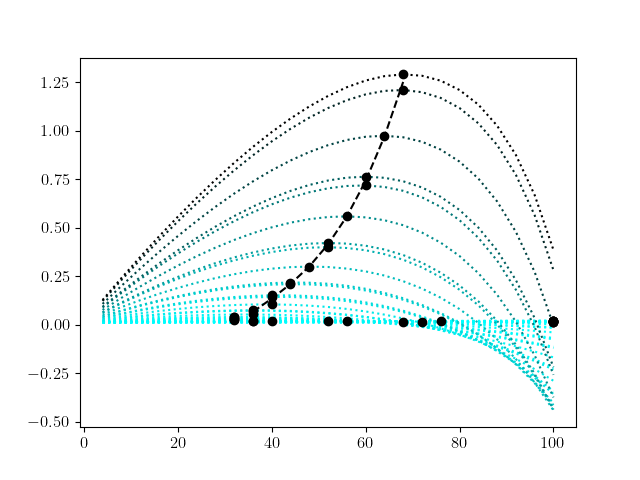

1.9990062131020943e-05 -0.0021606291076572844 0.09444437686370771 -1.4663332038614407


In [14]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

inflection_percs = []
inflection_deltas = []

for H in np.unique(data[:, n['power']])[2:]:
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = W_mean - Wrs
    plt.plot(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             color=(0, 1 - (np.log(H/5 + 1) / np.log(2))**8, 1 - (np.log(H/5 + 1) / np.log(2))**8),
            )
    inflection_perc = percentage[delta == delta.max()][0]
    inflection_delta = delta[delta == delta.max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
    inflection_percs.append(inflection_perc)
    inflection_deltas.append(inflection_delta)
    
inflection_percs = np.asarray(inflection_percs)
inflection_deltas = np.asarray(inflection_deltas)

top = inflection_deltas >= 0.045
bottom = inflection_deltas <= 0.045

def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, pcov = curve_fit(func, inflection_percs[top], inflection_deltas[top])
plt.plot(inflection_percs[top], func(inflection_percs[top], *popt), color='black', ls='--')
print(*popt)

<IPython.core.display.Javascript object>


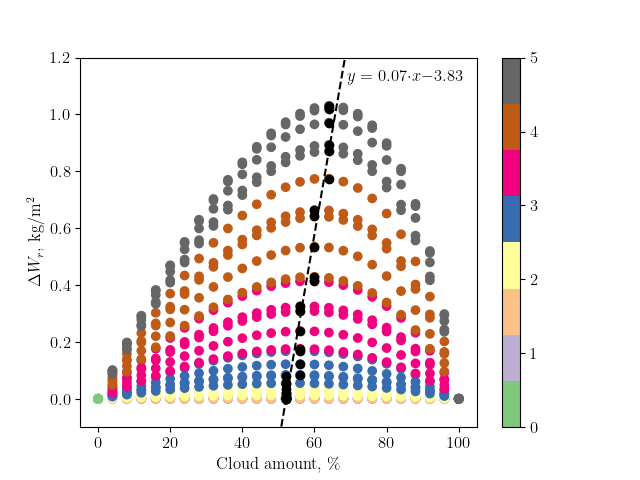

0.07350999203077013 -3.8324593117212284


In [12]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp2d
from scipy.optimize import curve_fit

plt.figure()

inflection_percs = []
inflection_deltas = []

for H in np.unique(data[:, n['power']])[:]:
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = Wr_mean - Wrs
    sc = plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), 
#              color=(0, 1 - (np.log(H/5 + 1) / np.log(2))**8, 1 - (np.log(H/5 + 1) / np.log(2))**8),
                c=[H] * len(percentage), vmin=0, vmax=5, cmap='Accent',
            )
    inflection_perc = percentage[delta == delta.max()][0]
    inflection_delta = delta[delta == delta.max()][0]
    
    inflection_percs.append(inflection_perc)
    inflection_deltas.append(inflection_delta)
    
inflection_percs = np.asarray(inflection_percs)
inflection_deltas = np.asarray(inflection_deltas)

top = inflection_deltas >= 0.00015
# bottom = inflection_deltas <= 0.00015

plt.scatter(inflection_percs[top], inflection_deltas[top], marker='o', color='black', zorder=99)

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, inflection_percs[top], inflection_deltas[top])
# plt.plot(inflection_percs[top], func(inflection_percs[top], *popt), color='black', ls='--')
print(*popt)
plt.plot(percentage, popt[0] * percentage + popt[1], ls='--', color='black')

plt.ylim(-0.1, 1.2)
if popt[1] >= 0:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x + $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))
else:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x - $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))

plt.xlabel(r'Cloud amount, $\%$')
plt.ylabel(r'$\Delta W_r$, kg/m$^2$')
plt.colorbar(sc)

<IPython.core.display.Javascript object>


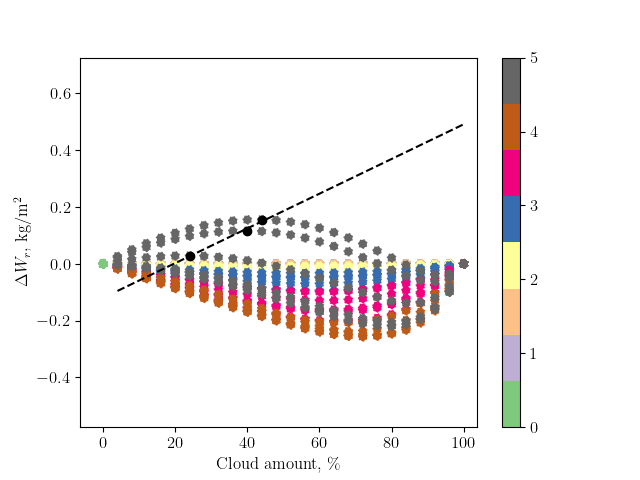

0.006107718005737062 -0.11998302425900653


In [121]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp2d
from scipy.optimize import curve_fit

plt.figure()

inflection_percs = []
inflection_deltas = []

for H in np.unique(data[:, n['power']])[:]:
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    Wr_mean = data[cond, n['Qr_mean']]
    Wrs = data[cond, n['Qrs']]
    delta = Wr_mean - Wrs
    sc = plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
#              color=(0, 1 - (np.log(H/5 + 1) / np.log(2))**8, 1 - (np.log(H/5 + 1) / np.log(2))**8),
                c=[H] * len(percentage), vmin=0, vmax=5, cmap='Accent',
            )
    inflection_perc = percentage[delta == delta.max()][0]
    inflection_delta = delta[delta == delta.max()][0]
    
    inflection_percs.append(inflection_perc)
    inflection_deltas.append(inflection_delta)
    
inflection_percs = np.asarray(inflection_percs)
inflection_deltas = np.asarray(inflection_deltas)

top = inflection_deltas >= 0.00015
# bottom = inflection_deltas <= 0.00015

plt.scatter(inflection_percs[top], inflection_deltas[top], marker='o', color='black', zorder=99)

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, inflection_percs[top], inflection_deltas[top])
# plt.plot(inflection_percs[top], func(inflection_percs[top], *popt), color='black', ls='--')
print(*popt)
plt.plot(percentage, popt[0] * percentage + popt[1], ls='--', color='black')

plt.ylim(-0.1, 1.2)
if popt[1] >= 0:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x + $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))
else:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x - $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))

plt.xlabel(r'Cloud amount, $\%$')
plt.ylabel(r'$\Delta W_r$, kg/m$^2$')
plt.colorbar(sc)

<IPython.core.display.Javascript object>


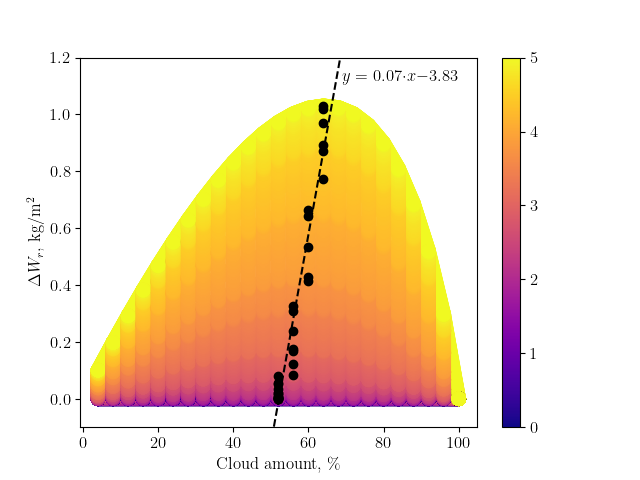

(39,)
(25,)
0.07350999203077013 -3.8324593117212284


In [15]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

cmap = 'plasma'
s = 90
alpha=1

plt.figure()

inflection_percs = []
inflection_deltas = []

h_range = np.unique(data[:, n['power']])[1:]
print(h_range.shape)
percentage = np.unique(data[:, n['procentage']])[1:]
print(percentage.shape)

for i, H in enumerate(h_range):
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = Wr_mean - Wrs
    f = interp1d(percentage, delta)
    N = 1000
    x = np.linspace(percentage.min(), percentage.max(), N)
    sc = plt.scatter(x, f(x), c=[H] * N, vmin=0, vmax=5, cmap=cmap, marker='o', s=s, alpha=alpha)
    
    inflection_perc = percentage[delta == delta.max()][0]
    inflection_delta = delta[delta == delta.max()][0]
    
    inflection_percs.append(inflection_perc)
    inflection_deltas.append(inflection_delta)

for p in percentage:
    cond = (data[:, n['procentage']] == p) & (data[:, n['freq_pair_no']] == 0)
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = Wr_mean - Wrs
    f = interp1d(h_range, delta)
    N=1000
    y = np.linspace(h_range.max(), h_range.min(), N)
    plt.scatter([p] * N, f(y), c=y[::-1], vmin=0, vmax=5, cmap=cmap, marker='o', s=s, alpha=alpha)
    
inflection_percs = np.asarray(inflection_percs)
inflection_deltas = np.asarray(inflection_deltas)

top = inflection_deltas >= 0.00015
# bottom = inflection_deltas <= 0.00015

plt.scatter(inflection_percs[top], inflection_deltas[top], marker='o', color='black', zorder=99999)

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, inflection_percs[top], inflection_deltas[top])
# plt.plot(inflection_percs[top], func(inflection_percs[top], *popt), color='black', ls='--')
print(*popt)
plt.plot(percentage, popt[0] * percentage + popt[1], ls='--', color='black')

plt.ylim(-0.1, 1.2)
if popt[1] >= 0:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x + $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))
else:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x - $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))

plt.xlabel(r'Cloud amount, $\%$')
plt.ylabel(r'$\Delta W_r$, kg/m$^2$')
plt.colorbar(sc)

<IPython.core.display.Javascript object>


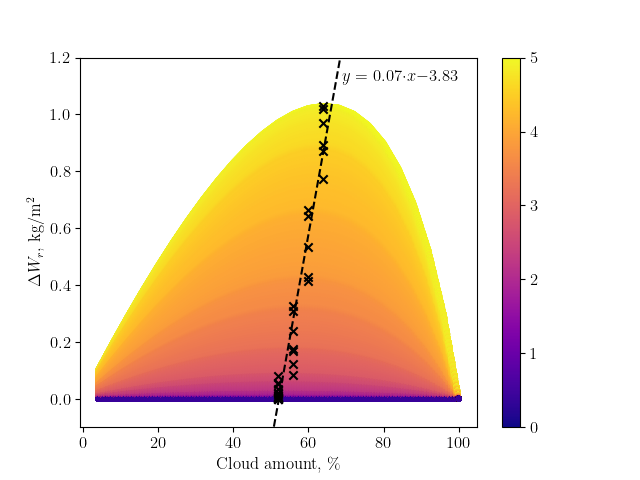

0.07350999203077013 -3.8324593117212284


In [29]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

cmap = 'plasma'
s = 10
alpha=1

plt.figure()

inflection_percs = []
inflection_deltas = []

h_range = np.unique(data[:, n['power']])[3:]
percentage = np.unique(data[:, n['procentage']])[1:]

N = 500
x = np.linspace(percentage.min(), percentage.max(), N)

M = 500
y = np.linspace(h_range.max(), h_range.min(), M)

F = {}

for i, H in enumerate(h_range):
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = Wr_mean - Wrs
    
    f = interp1d(percentage, delta)
    F[H] = f
    
    sc = plt.scatter(x, f(x), c=[H] * N, vmin=0, vmax=5, cmap=cmap, marker='o', s=s, alpha=alpha)

    inflection_percs.append(percentage[delta == delta.max()][0])
    inflection_deltas.append(delta[delta == delta.max()][0])

for p in x:

    f = interp1d(h_range, [F[h](p) for h in h_range])
    plt.scatter([p] * M, f(y), c=y[::1], vmin=0, vmax=5, cmap=cmap, marker='o', s=s, alpha=alpha)
    
inflection_percs = np.asarray(inflection_percs)
inflection_deltas = np.asarray(inflection_deltas)

top = inflection_deltas >= 0.00015

plt.scatter(inflection_percs[top], inflection_deltas[top], marker='x', color='black', zorder=99999)

def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, inflection_percs[top], inflection_deltas[top])
print(*popt)

plt.plot(percentage, popt[0] * percentage + popt[1], ls='--', color='black')

plt.ylim(-0.1, 1.2)
if popt[1] >= 0:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x + $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))
else:
    plt.text(69, 1.115, 
             '$y = $ ' + '{:.2f}'.format(np.round(popt[0], 2)) + 
             '$\cdot x - $' + '{:.2f}'.format(np.abs(np.round(popt[1], 2))))

plt.xlabel(r'Cloud amount, $\%$')
plt.ylabel(r'$\Delta W_r$, kg/m$^2$')
plt.colorbar(sc)

<IPython.core.display.Javascript object>


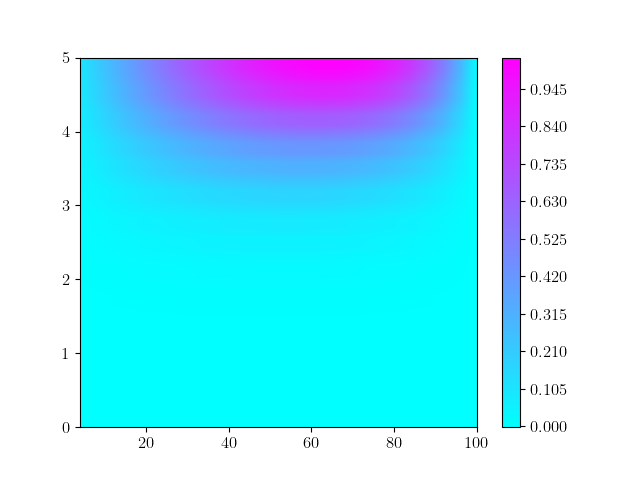

(25,) (40,) (40, 25)


In [16]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp2d
from scipy.optimize import curve_fit

plt.figure()

inflection_percs = []
inflection_deltas = []

X, Y, Z = [], [], []

X = np.unique(data[:, n['procentage']])[1:]

for H in np.unique(data[:, n['power']])[:]:
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = Wr_mean - Wrs

    Y.append(H)
    Z.append(delta)
    
    
X, Y, Z = map(np.asarray, [X, Y, Z])
print(X.shape, Y.shape, Z.shape)

f = interp2d(X, Y, Z, kind='quintic', copy=True, bounds_error=True, fill_value=None)

# X = np.asarray([X] * len(Y))
# Y = np.asarray([Y] * len(X))

c = plt.contourf(X, Y, f(X, Y), levels=500, cmap='cool')
plt.colorbar(c)

In [ ]:
#################################################################################

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[2:]:
    if not (3<=H):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = W_mean - Wrs
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=3, vmax=5, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[2:]:
    if not (1.5<=H<=3):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = W_mean - Wrs
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=1.5, vmax=3, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[4:]:
    if not (H < 1.5):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wrs = data[cond, n['Wrs']]
    delta = W_mean - Wrs
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=0, vmax=1.5, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[2:]:
    if not (3<=H):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    delta = W_mean - Wr_mean
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=3, vmax=5, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[2:]:
    if not (1.5<=H<3):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    delta = W_mean - Wr_mean
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=1.5, vmax=3, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.figure()

for H in np.unique(data[:, n['power']])[2:]:
    if not (H<1.5):
        continue
    cond = np.isclose(data[:, n['power']], H) & (data[:, n['freq_pair_no']] == 0)
    percentage = data[cond, n['procentage']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    delta = W_mean - Wr_mean
    plt.scatter(percentage, delta, label='{:.2f} km'.format(np.round(H, decimals=2)), ls=':', 
             c=[H] * len(percentage), cmap='cool', marker='.',
                vmin=0, vmax=1.5, linestyle='-',
            )
    plt.plot(percentage, delta, ls=':', color='gray', alpha=0.5)
    inflection_perc = percentage[np.abs(delta) == np.abs(delta).max()][0]
    inflection_delta = delta[np.abs(delta) == np.abs(delta).max()][0]
    plt.plot(inflection_perc, inflection_delta, marker='o', color='black', zorder=99)
    
plt.colorbar()

In [ ]:
plt.figure()
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 0)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 1)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 2)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
plt.ylim(-0.5, 2.1)
plt.grid()

In [ ]:
plt.figure()
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 0)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]) / data[cond, n['W_mean']] * 100)
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 1)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]) / data[cond, n['W_mean']] * 100)
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 2)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]) / data[cond, n['W_mean']] * 100)
# plt.ylim(-0.5, 2.1)
plt.grid()

In [ ]:
np.unique(data[:, n['procentage']])

In [ ]:
plt.figure()
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 0)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 1)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 2)
plt.plot(data[cond, n['W_mean']], (data[cond, n['W_mean']] - data[cond, n['Wr_mean']]))
plt.ylim(-0.5, 2.1)

In [ ]:
plt.figure()
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 0)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 1)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 2)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
# plt.ylim(-0.5, 2.1)

In [ ]:
plt.figure()
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 0)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 1)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
cond = (data[:, n['procentage']] == 20.) & (data[:, n['freq_pair_no']] == 2)
plt.plot(data[cond, n['W_mean']], (data[cond, n['Q_mean']] - data[cond, n['Qr_mean']]))
# plt.ylim(-0.5, 2.1)

In [ ]:
cond = (data[:, n['procentage']] == 100.) & (data[:, n['freq_pair_no']] == 1) 
plt.figure()
plt.scatter(_c0 * np.power(data[cond, n['power']], _c1), data[cond, n['W_mean']])

In [ ]:
_c0 * np.power(3.3, _c1)